In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from scipy.special import expit
from sklearn.model_selection import train_test_split

In [6]:
n_samples = 500
np.random.seed(0)

X = np.random.normal(size=n_samples)

In [7]:
X[:10]

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ])

In [8]:
y = (X > 0).astype(float)

In [9]:
y[:10]

array([1., 1., 1., 1., 1., 0., 1., 0., 0., 1.])

In [10]:
X[X > 0] *= 2

In [11]:
X[:10]

array([ 3.52810469,  0.80031442,  1.95747597,  4.4817864 ,  3.73511598,
       -0.97727788,  1.90017684, -0.15135721, -0.10321885,  0.821197  ])

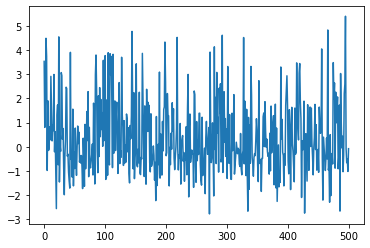

In [12]:
plt.plot(X)

In [13]:
#STEP 1 - Create a model object
#lrm = linear_model.LogisticRegression()

In [14]:
#lrm

In [15]:
#STEP 2 - Train the model - relationship between features and target
lrm.fit(X[:, np.newaxis], y)

NameError: name 'lrm' is not defined

In [16]:
plt.figure(1,figsize=(4,3))

<Figure size 288x216 with 0 Axes>

<Figure size 288x216 with 0 Axes>

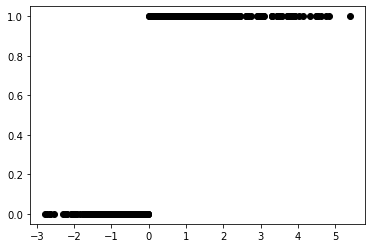

In [17]:
plt.scatter(X, y, color="black", zorder=3)

In [18]:
X_test = np.linspace(-5, 10, 300)
X_test[:10]

array([-5.        , -4.94983278, -4.89966555, -4.84949833, -4.7993311 ,
       -4.74916388, -4.69899666, -4.64882943, -4.59866221, -4.54849498])

In [19]:
df = pd.read_csv('Fracture Dataset.csv')

In [20]:
df.head()

,id,age,sex,fracture,weight_kg,height_cm,medication,bone_density
0,469,57.052768,F,no fracture,64.0,155.5,Anticonvulsant,0.8793
1,8724,75.741225,F,no fracture,78.0,162.0,No medication,0.7946
2,6736,70.778900,M,no fracture,73.0,170.5,No medication,0.9067
3,24180,78.247175,F,no fracture,60.0,148.0,No medication,0.7112
4,17072,54.191877,M,no fracture,55.0,161.0,No medication,0.7909


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            169 non-null    int64  
 1   age           169 non-null    float64
 2   sex           169 non-null    object 
 3   fracture      169 non-null    object 
 4   weight_kg     169 non-null    float64
 5   height_cm     169 non-null    float64
 6   medication    169 non-null    object 
 7   bone_density  169 non-null    float64
dtypes: float64(4), int64(1), object(3)
memory usage: 10.7+ KB


In [22]:
df.describe()

,id,age,weight_kg,height_cm,bone_density
count,169.000000,169.000000,169.000000,169.000000,169.000000
mean,9102.556213,63.631531,64.665680,160.254438,0.783104
std,8744.623598,12.356936,11.537171,7.928272,0.166529
min,35.000000,35.814058,36.000000,142.000000,0.407600
25%,2018.000000,54.424211,56.000000,154.000000,0.670800
50%,6702.000000,63.487837,64.500000,160.500000,0.786100
75%,17100.000000,72.080558,73.000000,166.000000,0.888800
max,24208.000000,88.753795,96.000000,177.000000,1.362400


In [23]:
df['sex'].unique()

array(['F', 'M'], dtype=object)

In [24]:
df['medication'].unique()

array(['Anticonvulsant', 'No medication', 'Glucocorticoids'], dtype=object)

In [25]:
df['fracture'].unique()

array(['no fracture', 'fracture'], dtype=object)

In [26]:
gender_code = {'F':1, 'M':0}
df['sex'] = df['sex'].map(gender_code)

In [27]:
fracture_code = {'no fracture':0, 'fracture':1}
df['fracture'] = df['fracture'].map(fracture_code)

In [28]:
medication_code = {'Anticonvulsant':1, 'No medication':0, 'Glucocorticoids':2}
df['medication'] = df['medication'].map(medication_code)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            169 non-null    int64  
 1   age           169 non-null    float64
 2   sex           169 non-null    int64  
 3   fracture      169 non-null    int64  
 4   weight_kg     169 non-null    float64
 5   height_cm     169 non-null    float64
 6   medication    169 non-null    int64  
 7   bone_density  169 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 10.7 KB


In [30]:
df.describe()

,id,age,sex,fracture,weight_kg,height_cm,medication,bone_density
count,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000
mean,9102.556213,63.631531,0.491124,0.295858,64.665680,160.254438,0.337278,0.783104
std,8744.623598,12.356936,0.501407,0.457784,11.537171,7.928272,0.714539,0.166529
min,35.000000,35.814058,0.000000,0.000000,36.000000,142.000000,0.000000,0.407600
25%,2018.000000,54.424211,0.000000,0.000000,56.000000,154.000000,0.000000,0.670800
50%,6702.000000,63.487837,0.000000,0.000000,64.500000,160.500000,0.000000,0.786100
75%,17100.000000,72.080558,1.000000,1.000000,73.000000,166.000000,0.000000,0.888800
max,24208.000000,88.753795,1.000000,1.000000,96.000000,177.000000,2.000000,1.362400


In [31]:
df = df.drop(['id'], axis=1)

In [32]:
df.describe()

,age,sex,fracture,weight_kg,height_cm,medication,bone_density
count,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000
mean,63.631531,0.491124,0.295858,64.665680,160.254438,0.337278,0.783104
std,12.356936,0.501407,0.457784,11.537171,7.928272,0.714539,0.166529
min,35.814058,0.000000,0.000000,36.000000,142.000000,0.000000,0.407600
25%,54.424211,0.000000,0.000000,56.000000,154.000000,0.000000,0.670800
50%,63.487837,0.000000,0.000000,64.500000,160.500000,0.000000,0.786100
75%,72.080558,1.000000,1.000000,73.000000,166.000000,0.000000,0.888800
max,88.753795,1.000000,1.000000,96.000000,177.000000,2.000000,1.362400


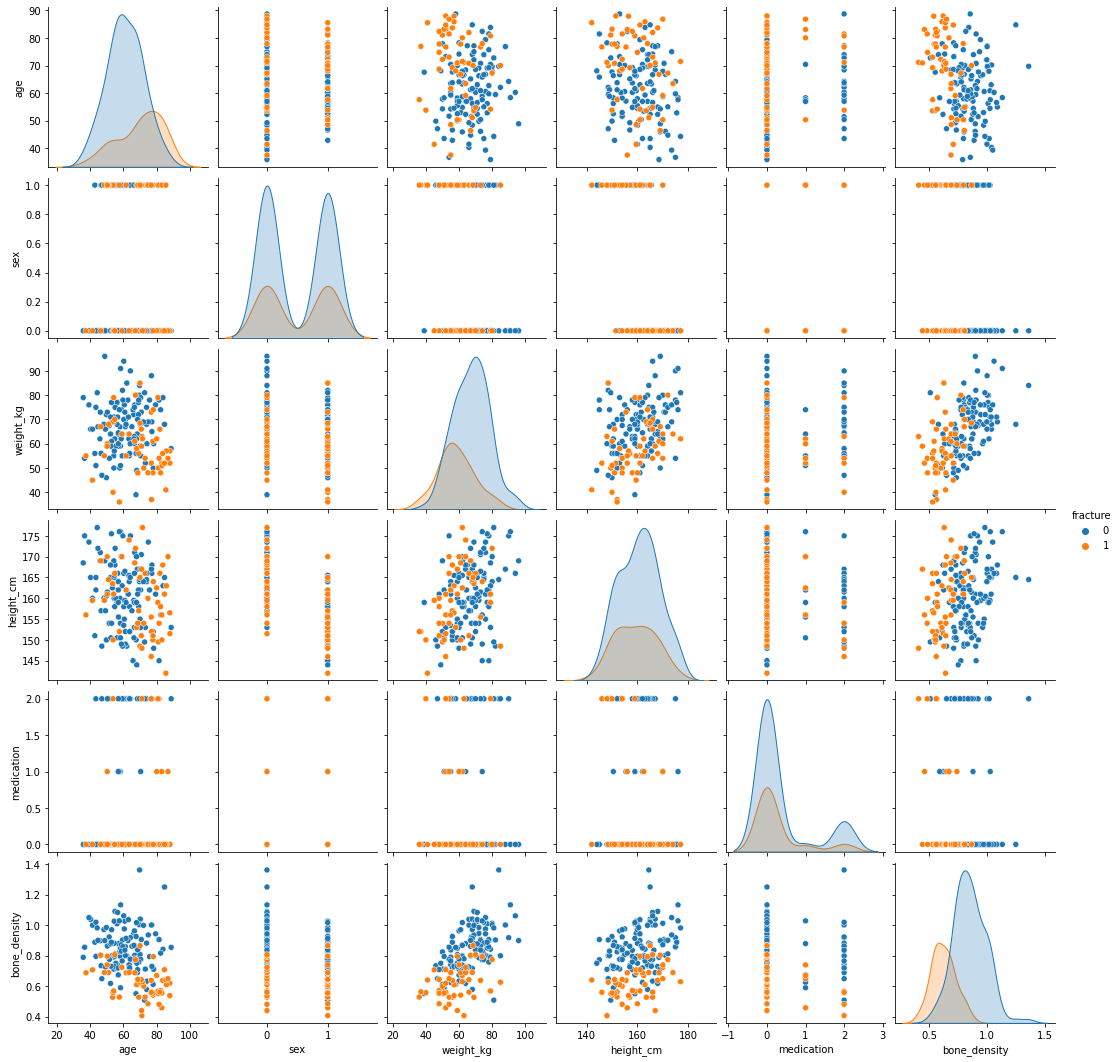

In [33]:
sns.pairplot(df,hue='fracture')

In [34]:
y = df['fracture']
y

0      0
1      0
2      0
3      0
4      0
      ..
164    1
165    1
166    1
167    1
168    1
Name: fracture, Length: 169, dtype: int64

In [35]:
df.columns

Index(['age', 'sex', 'fracture', 'weight_kg', 'height_cm', 'medication',
       'bone_density'],
      dtype='object')

In [36]:
X = df[['age', 'sex', 'weight_kg', 'height_cm', 'medication','bone_density']]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [38]:
#STEP 1 --> create the logistic regression model
lrm = linear_model.LogisticRegression()
lrm

LogisticRegression()

In [39]:
X_train.size

678

In [40]:
X_train.shape

(113, 6)

In [41]:
y_train.shape

(113,)

In [42]:
#STEP 2 --> 
lrm.fit(X_train, y_train)

LogisticRegression()

In [43]:
lrm.coef_

array([[ 0.05235865, -0.73845484, -0.06519163,  0.01428253, -0.41415145,
        -2.4808583 ]])

In [44]:
lrm.intercept_

array([-0.07210364])

In [45]:
predictions = lrm.predict(X_test)

In [46]:
predictions

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1], dtype=int64)

In [47]:
results = X_test
results

,age,sex,weight_kg,height_cm,medication,bone_density
138,69.977701,1,85.0,148.5,0,0.6264
30,54.912534,0,69.0,168.0,0,1.0909
119,83.093647,1,52.0,156.0,1,0.4586
29,75.015480,0,69.0,173.5,0,0.9364
143,81.979559,0,66.0,166.0,0,0.5615
162,50.276059,1,60.0,170.0,1,0.7399
165,50.285303,1,59.0,161.0,0,0.7971
51,67.573380,0,39.0,159.0,0,0.5514
105,68.571308,1,48.0,161.0,0,0.7096
60,63.673184,1,63.0,158.0,0,0.7095


In [48]:
results = results.reset_index(drop=True)
results

,age,sex,weight_kg,height_cm,medication,bone_density
0,69.977701,1,85.0,148.5,0,0.6264
1,54.912534,0,69.0,168.0,0,1.0909
2,83.093647,1,52.0,156.0,1,0.4586
3,75.015480,0,69.0,173.5,0,0.9364
4,81.979559,0,66.0,166.0,0,0.5615
5,50.276059,1,60.0,170.0,1,0.7399
6,50.285303,1,59.0,161.0,0,0.7971
7,67.573380,0,39.0,159.0,0,0.5514
8,68.571308,1,48.0,161.0,0,0.7096
9,63.673184,1,63.0,158.0,0,0.7095


In [49]:
#Concatenate prediction to table
results['prediction'] = predictions
results

,age,sex,weight_kg,height_cm,medication,bone_density,prediction
0,69.977701,1,85.0,148.5,0,0.6264,0
1,54.912534,0,69.0,168.0,0,1.0909,0
2,83.093647,1,52.0,156.0,1,0.4586,1
3,75.015480,0,69.0,173.5,0,0.9364,0
4,81.979559,0,66.0,166.0,0,0.5615,1
5,50.276059,1,60.0,170.0,1,0.7399,0
6,50.285303,1,59.0,161.0,0,0.7971,0
7,67.573380,0,39.0,159.0,0,0.5514,1
8,68.571308,1,48.0,161.0,0,0.7096,1
9,63.673184,1,63.0,158.0,0,0.7095,0


In [50]:
y_test[:10]

138    1
30     0
119    1
29     0
143    1
162    1
165    1
51     0
105    0
60     0
Name: fracture, dtype: int64

In [52]:
X_test.shape

(56, 6)

In [53]:
y_test.shape

(56,)

In [51]:
score = lrm.score(X_test, y_test)
score

0.8392857142857143

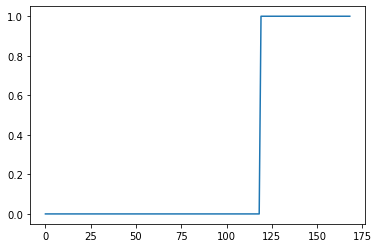

In [122]:
#shows the data is not random and may be sorted by fracture --> use test_train_split to grab a random sample
plt.plot(df['fracture'])

<AxesSubplot:xlabel='fracture', ylabel='Count'>

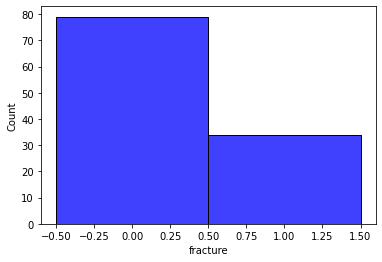

In [123]:
sns.histplot(x=y_train,stat='count',cbar=True,discrete=True,color='b')

<AxesSubplot:xlabel='fracture', ylabel='Count'>

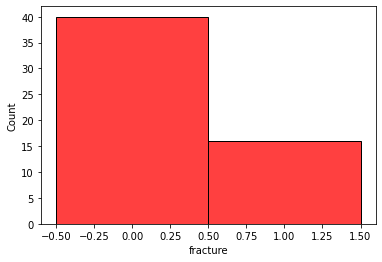

In [124]:
sns.histplot(x=y_test,stat='count',cbar=True,discrete=True,color='r')